# Image Classification 

* Dataset: [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Images
* **Images**: Matrix of numbers (pixels). Each pixel holds a number we will work with
* **Images with colors**: Multi channel. 3 values needed.
* **Greyscale images**: Single channel images. 1 value needed.
* Every image is 28x28 pixels.

# 4 values

* **List of images**: (1, 2, 3, 4)
* **Value 1**: Number of images in the list
* **Value 2,3**: Height and width of the image
* **Value 4**: Number of channels in the image

In [2]:
# Get data
data = 'mnist.csv'
df = pd.read_csv(data)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Shape of the data
df.shape

(10000, 785)

In [4]:
# Features
X = df[df.columns[1:]]

# Labels
y = df['label']

In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


## Let us scale our data as we can see the variance of the mean.
Let's scale the pictures so they are at a value between 0 and 1.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fit_scaler = scaler.fit(X)
scaled_pixels = scaler.transform(X)

## Helper function to display images

In [7]:
# Helper function
def display_image(features, image_label):

    # Labels
    label_names = {
        0: 'T-shirt',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
    
    print('This is a', label_names[image_label].lower())
    plt.imshow(features.reshape(28,28))

This is a pullover


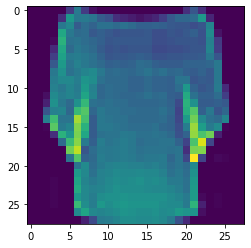

In [8]:
# Test to display image
display_image(X.loc[5].values, y.loc[5])

## Split our data
We will go ahead and split our data into test and train sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Fit model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(solver='sag', multi_class='auto', max_iter=1000).fit(X_train, y_train)

C:\Users\Helena\Anaconda3\envs\pysyft\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Evaluate

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict, normalize=True)
print(f'Accuracy of model: {accuracy*100}%')

Accuracy of model: 78.325%


# Neural Network comparision
CNN with PyTorch

In [15]:
import torch
import torchvision

cuda = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print(cuda)

cuda:0


In [19]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
print("X_train: ", X_train_tensor.shape)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
print("X_test: ", X_test_tensor.shape)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
print("y_train: ", y_train_tensor.shape)

y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
print("y_test: ", y_test_tensor.shape)

X_train:  torch.Size([6000, 784])
X_test:  torch.Size([4000, 784])
y_train:  torch.Size([6000])
y_test:  torch.Size([4000])


## Reshape images to 1, 28x28

In [20]:
X_train_tensor = torch.Tensor(X_train_tensor.reshape((-1, 1, 28, 28)))

X_test_tensor = torch.Tensor(X_test_tensor.reshape((-1, 1, 28, 28)))

print("X_train: ", X_train_tensor.shape)
print("X_test: ", X_test_tensor.shape)

X_train:  torch.Size([6000, 1, 28, 28])
X_test:  torch.Size([4000, 1, 28, 28])


## Setting up our neural network

In [21]:
# Input size, for grayscale 1 and for color 3
input_size = 1

# Hidden layers
hidden_1 = 1
hidden_2 = 32

# Output values, we have 10 different labels
print(f'Check number of labels: {len(df["label"].unique())}')
output = 10
      
nn_size = 5

Check number of labels: 10


## Setting up the model

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
class CNN_Model(nn.Module):
    
    def __init__(self):
        super(CNN_Model, self).__init__()
        
        # Layer 1
        self.layer_1 = nn.Sequential(
            nn.Conv2d(input_size, hidden_1, nn_size),
            nn.BatchNorm2d(hidden_1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Layer 2
        self.layer_2 = nn.Sequential(
            nn.Conv2d(input_size, hidden_2, nn_size),
            nn.BatchNorm2d(hidden_2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Final layer
        self.final_layer = nn.Linear(512, output)
        
    def forward(self, x):
        
        out = self.layer_1(x)
        print("Layer 1: ", out.shape)

        out = self.layer_2(out)
        print("Layer 2: ", out.shape)

        out = out.reshape(out.size(0), -1)

        out = self.final_layer(out)
        print("Final layer: ", out.shape)
        
        return out

In [26]:
# Move model to cuda
model = CNN_Model()
model.to(cuda)

CNN_Model(
  (layer_1): Sequential(
    (0): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (final_layer): Linear(in_features=512, out_features=10, bias=True)
)

In [27]:
# Move X and y to cuda
X_train_tensor = X_train_tensor.to(cuda)
X_test_tensor = X_test_tensor.to(cuda)

y_train_tensor = y_train_tensor.to(cuda)
y_test_tensor = y_test_tensor.to(cuda)

## Setting up parameters

In [28]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [32]:
epochs = 100
loss_list = list()

for epoch in range(1, epochs):
    
    # Calculate output and loss
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Zero out gradient
    optimizer.zero_grad()
    
    # Backward pas
    loss.backward()
    
    # Update model parameters
    optimizer.step()
    
    print(f'Epoch: {epoch} Loss {loss.item()}')
    loss_list.append(loss.item())

Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 1 Loss 0.5122336745262146
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 2 Loss 0.5102289915084839
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 3 Loss 0.508249044418335
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 4 Loss 0.506294846534729
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 5 Loss 0.5043638348579407
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 6 Loss 0.5024544596672058
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([600

Epoch: 56 Loss 0.42536357045173645
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 57 Loss 0.4240924119949341
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 58 Loss 0.42282792925834656
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 59 Loss 0.4215727150440216
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 60 Loss 0.42032742500305176
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 61 Loss 0.4190911054611206
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([6000, 32, 4, 4])
Final layer:  torch.Size([6000, 10])
Epoch: 62 Loss 0.41786253452301025
Layer 1:  torch.Size([6000, 1, 12, 12])
Layer 2:  torch.Size([

## Plot loss values

ValueError: x and y must have same first dimension, but have shapes (9,) and (99,)

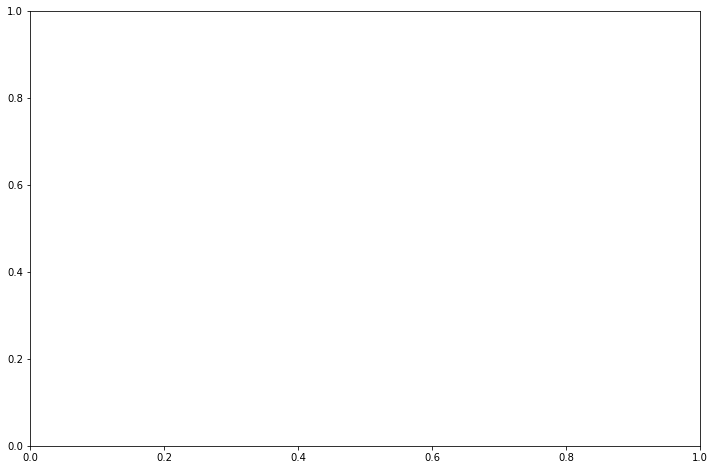

In [30]:
x = (range(0, 99))

plt.figure(figsize=(12,8))
plt.plot(x, loss_list, 'go--', linewidth=2, markersize=12, color='purple')
plt.xlabel('Epoch', fontsize=22, color='white')
plt.ylabel('Loss', fontsize=22, color='white')
plt.gcf().set_facecolor("purple");

## Evaluate model

In [159]:
model.eval()

CNN_Model(
  (layer_1): Sequential(
    (0): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (final_layer): Linear(in_features=512, out_features=10, bias=True)
)

In [160]:
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    
    accuracy_cnn = accuracy_score(predicted, y_test)
    
    print(f'Accuracy: {accuracy_score(predicted, y_test)}')

Layer 1:  torch.Size([4000, 1, 12, 12])
Layer 2:  torch.Size([4000, 32, 4, 4])
Final layer:  torch.Size([4000, 10])


NameError: name 'accuracy_score' is not defined

## Conclusions

In [ ]:
# Compared models
print(f'Accuracy of LogisticRegression: {accuracy*100}%')
print(f'Accuracy of CNN/PyTorch: {accuracy_cnn*100}%')